In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

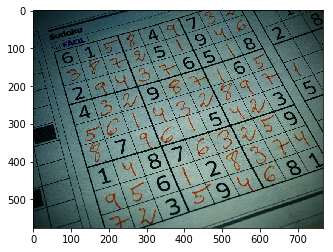

In [99]:
image = cv2.imread('images/soduku.jpg')
plt.imshow(image)

In [100]:
# Sobel( src_gray, grad_y, ddepth, 0, 1, 3, scale, delta, BORDER_DEFAULT );
# The function takes the following arguments:

# src_gray: In our example, the input image. Here it is CV_8U
# grad_x/grad_y: The output image.
# ddepth: The depth of the output image. We set it to CV_16S to avoid overflow.
# x_order: The order of the derivative in x direction.
# y_order: The order of the derivative in y direction.
# scale, delta and BORDER_DEFAULT: We use default values.
# Notice that to calculate the gradient in x direction we use: x_{order}= 1 and y_{order} = 0. We do analogously for the y direction.

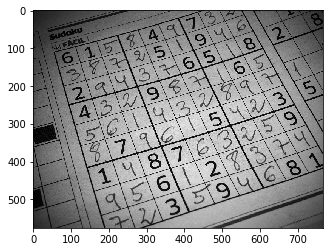

In [101]:
#convert to grayscale
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [102]:
# apply gaussian blur
blur = cv2.GaussianBlur(gray_image,(7,7),0)


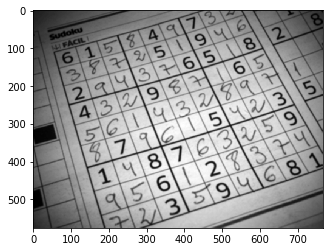

In [103]:
plt.imshow(blur, cmap='gray')

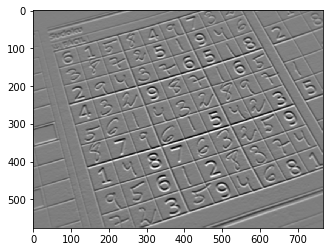

In [104]:
# Extract Sobel Edges
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobel_x, cmap='gray')
# cv2.imshow('sobel_x', sobel_x)
# cv2.waitKey()
# cv2.destroyAllWindows()

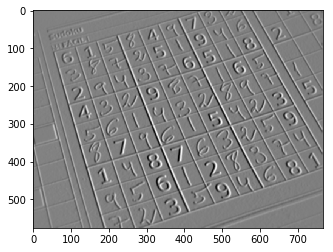

In [105]:
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobel_y, cmap='gray')
# cv2.imshow('sobel_y', sobel_y)
# cv2.waitKey()
# cv2.destroyAllWindows()

# canny edges

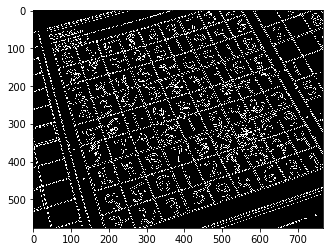

In [106]:
canny = cv2.Canny(image, 90, 170)
plt.imshow(canny, cmap='gray')
# cv2.imshow('Canny', canny)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [93]:
# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 240)

https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/

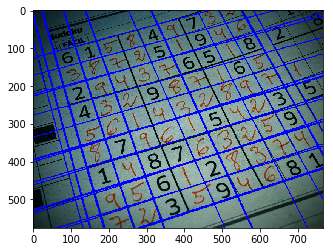

In [97]:
# The below for loop runs till r and theta values  
# are in the range of the 2d array
for i in range(len(lines)):
    for r,theta in lines[i]: 

        # Stores the value of cos(theta) in a 
        a = np.cos(theta) 

        # Stores the value of sin(theta) in b 
        b = np.sin(theta) 

        # x0 stores the value rcos(theta) 
        x0 = a*r 

        # y0 stores the value rsin(theta) 
        y0 = b*r 

        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
        x1 = int(x0 + 1000*(-b)) 

        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
        y1 = int(y0 + 1000*(a)) 

        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
        x2 = int(x0 - 1000*(-b)) 

        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
        y2 = int(y0 - 1000*(a)) 

        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
        # (0,0,255) denotes the colour of the line to be  
        #drawn. In this case, it is red.
        cv2.line(image,(x1,y1), (x2,y2), (0,0,255),2)

plt.imshow(image)
# cv2.imshow('Hough Lines', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()